# Выпускная квалификационная работа по курсу «Data Science»

### Постановка задачи: прогнозирование конечных свойств новых материалов (композиционных материалов)

##### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline
from matplotlib.pyplot import hist
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from scipy import stats
from keras.models import Sequential
from keras import models
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam

## Разведочный анализ данных

##### Загрузка данных X_bp

In [2]:
x_bp_df = x_bp_df = pd.read_excel('../data/X_bp.xlsx', sheet_name='X_bp.csv')
x_bp_df

,Unnamed: 0,01SMN,02Pl,03MU,04KO,05SEG,06TV,07PP,08MUR,09PR,10PS
0,0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...
1018,1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


Датасет X_bp содержит 1023 строки и 11 колонок

##### Загрузка данных X_nup

In [3]:
x_nup_df = pd.read_excel('../data/X_nup.xlsx', sheet_name='X_nup.csv')
x_nup_df

,Unnamed: 0,11UgN,12ShN,13PlN
0,0,0,4.000000,57.000000
1,1,0,4.000000,60.000000
2,2,0,4.000000,70.000000
3,3,0,5.000000,47.000000
4,4,0,5.000000,57.000000
...,...,...,...,...
1035,1035,90,8.088111,47.759177
1036,1036,90,7.619138,66.931932
1037,1037,90,9.800926,72.858286
1038,1038,90,10.079859,65.519479


Датасет X_nup содержит 1040 строк и 4 колонки

##### Объединение двух датасетов в один по индексу тип объединения INNER

In [4]:
unite_df = x_bp_df.merge(x_nup_df, left_index=True, right_index=True, how='inner')
unite_df 

,Unnamed: 0_x,01SMN,02Pl,03MU,04KO,05SEG,06TV,07PP,08MUR,09PR,10PS,Unnamed: 0_y,11UgN,12ShN,13PlN
0,0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,0,4.000000,57.000000
1,1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,1,0,4.000000,60.000000
2,2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,2,0,4.000000,70.000000
3,3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,3,0,5.000000,47.000000
4,4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,4,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1018,90,9.076380,47.019770
1019,1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1019,90,10.565614,53.750790
1020,1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1020,90,4.161154,67.629684
1021,1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1021,90,6.313201,58.261074


Удаление ненужных столбцов - Unnamed: 0_x и Unnamed: 0_x

In [5]:
unite_df.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'], axis = 1, inplace=True)
unite_df 

,01SMN,02Pl,03MU,04KO,05SEG,06TV,07PP,08MUR,09PR,10PS,11UgN,12ShN,13PlN
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


Объединенный датасет (unite_df) содержит 1023 строки и 13 колонок

##### Вывод списка столбцов с их типами данных и количеством ненулевых значений в каждом из них 

In [6]:
unite_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   01SMN   1023 non-null   float64
 1   02Pl    1023 non-null   float64
 2   03MU    1023 non-null   float64
 3   04KO    1023 non-null   float64
 4   05SEG   1023 non-null   float64
 5   06TV    1023 non-null   float64
 6   07PP    1023 non-null   float64
 7   08MUR   1023 non-null   float64
 8   09PR    1023 non-null   float64
 9   10PS    1023 non-null   float64
 10  11UgN   1023 non-null   int64  
 11  12ShN   1023 non-null   float64
 12  13PlN   1023 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 111.9 KB


Все данные количественные (float и int). Ни одна из записей не является NaN, очистка не требуется

##### Поиск пропуска данных с помощью функции isnull

In [7]:
unite_df.isnull().sum()

01SMN    0
02Pl     0
03MU     0
04KO     0
05SEG    0
06TV     0
07PP     0
08MUR    0
09PR     0
10PS     0
11UgN    0
12ShN    0
13PlN    0
dtype: int64

Нулевых значений нет, очистка не требуется

##### Поиск уникальных значений с помощью функции nunique

In [8]:
unite_df.nunique()

01SMN    1014
02Pl     1013
03MU     1020
04KO     1005
05SEG    1004
06TV     1003
07PP     1004
08MUR    1004
09PR     1004
10PS     1003
11UgN       2
12ShN     989
13PlN     988
dtype: int64

Функция показывает общее число уникальных значений в каждом столбце

##### С помощью метода describe получаем основные статистические характеристики по каждой переменной

In [9]:
unite_df.describe().round(4)

,01SMN,02Pl,03MU,04KO,05SEG,06TV,07PP,08MUR,09PR,10PS,11UgN,12ShN,13PlN
count,1023.0000,1023.0000,1023.0000,1023.0000,1023.0000,1023.0000,1023.0000,1023.0000,1023.0000,1023.0000,1023.0000,1023.0000,1023.0000
mean,2.9304,1975.7349,739.9232,110.5708,22.2444,285.8822,482.7318,73.3286,2466.9228,218.4231,44.2522,6.8992,57.1539
std,0.9132,73.7292,330.2316,28.2959,2.4063,40.9433,281.3147,3.1190,485.6280,59.7359,45.0158,2.5635,12.3510
min,0.3894,1731.7646,2.4369,17.7403,14.2550,100.0000,0.6037,64.0541,1036.8566,33.8030,0.0000,0.0000,0.0000
25%,2.3179,1924.1555,500.0475,92.4435,20.6080,259.0665,266.8166,71.2450,2135.8504,179.6275,0.0000,5.0800,49.7992
50%,2.9069,1977.6217,739.6643,110.5648,22.2307,285.8968,451.8644,73.2688,2459.5245,219.1989,0.0000,6.9161,57.3419
75%,3.5527,2021.3744,961.8125,129.7304,23.9619,313.0021,693.2250,75.3566,2767.1931,257.4817,90.0000,8.5863,64.9450
max,5.5917,2207.7735,1911.5365,198.9532,33.0000,413.2734,1399.5424,82.6821,3848.4367,414.5906,90.0000,14.4405,103.9889


Где:

*   count - количество строк
*   mean - среднее значение
*   std - стандартное отклонение
*   min - минимальное значение
*   25% - первый квартиль
*   50%	- второй квартиль, медиана
*   75% - третий квартиль
*   max - максимальное значение

##### Визуализация гистограмм распределения каждой из переменных

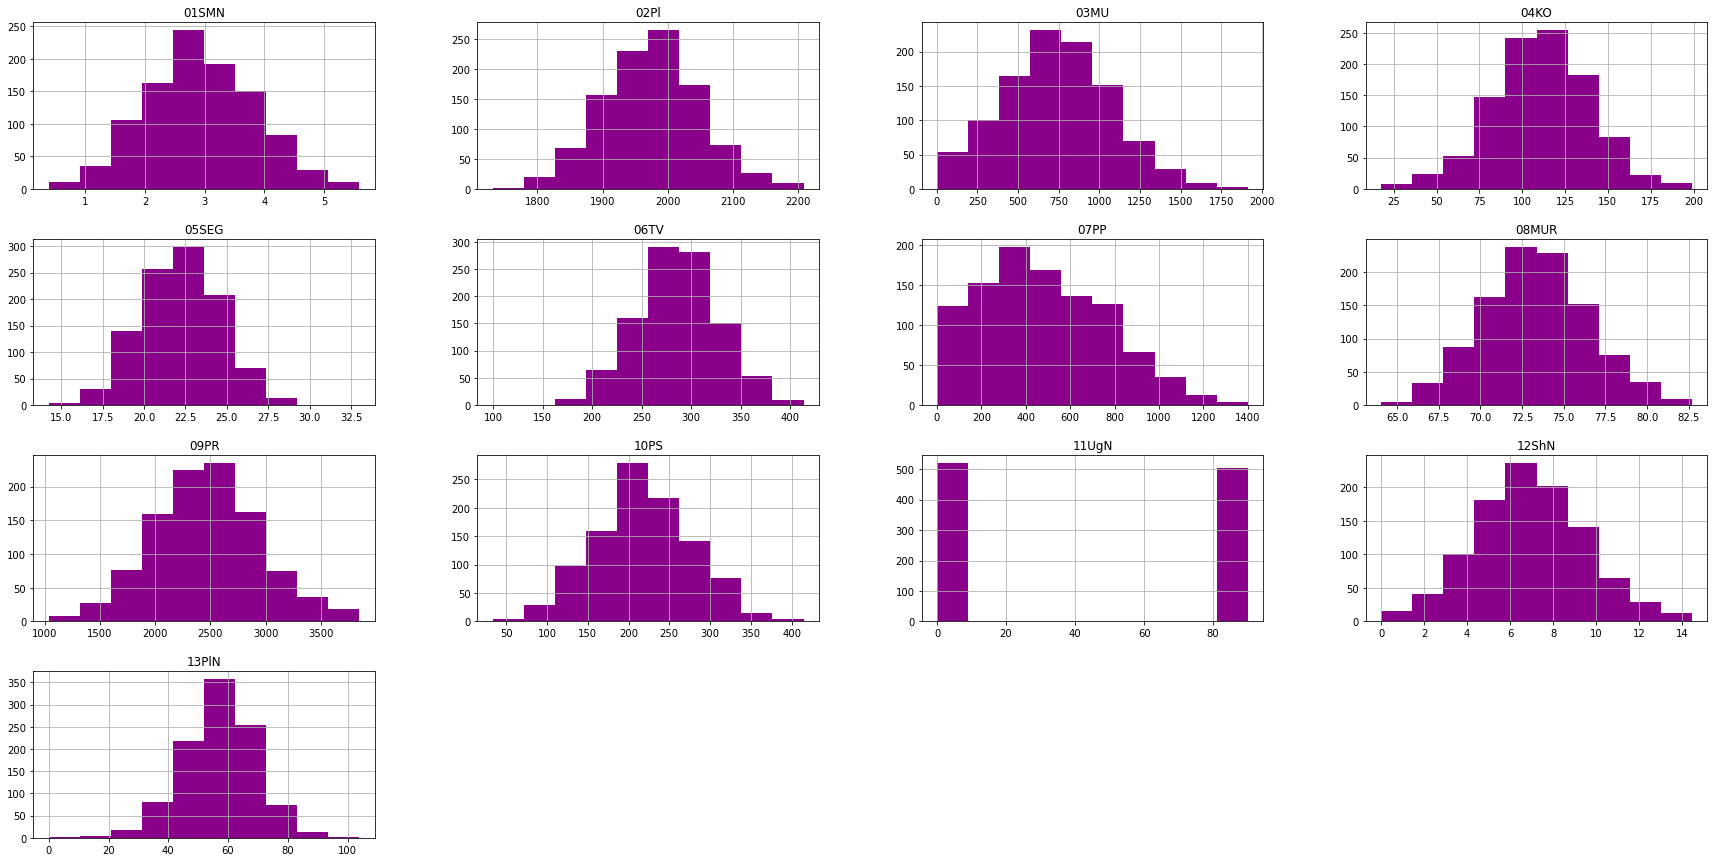

In [10]:
unite_df.hist(figsize = (30, 15), color='darkmagenta')
plt.show()

##### Визуализация диаграмм ящика с усами каждой из переменных

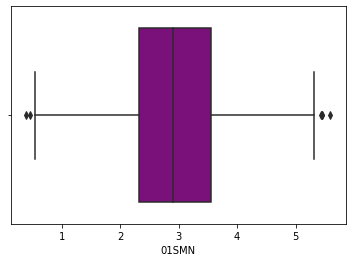

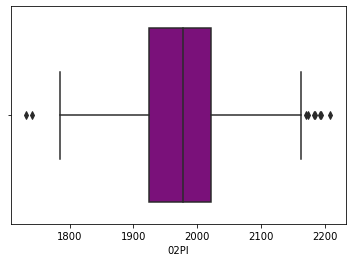

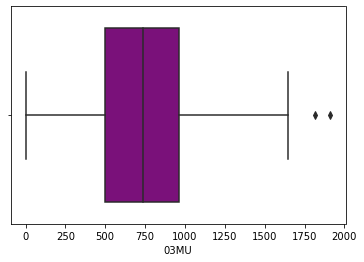

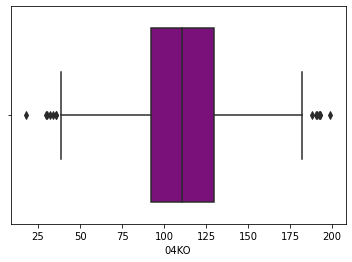

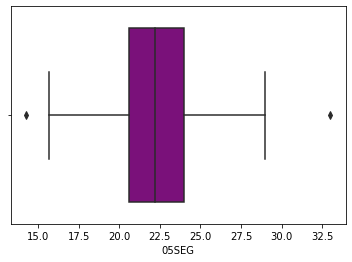

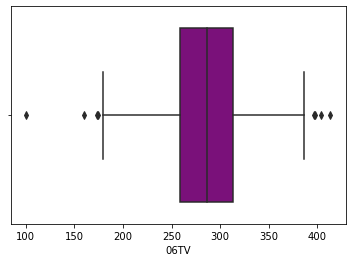

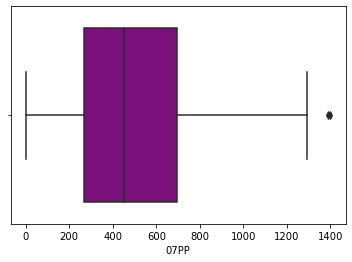

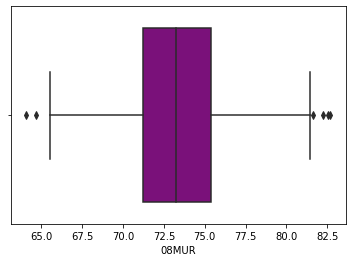

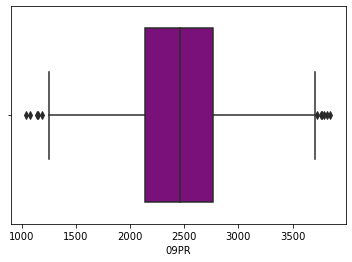

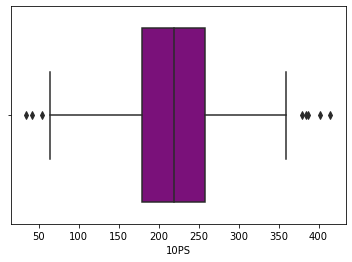

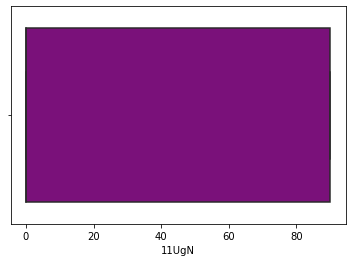

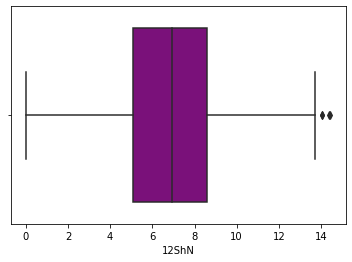

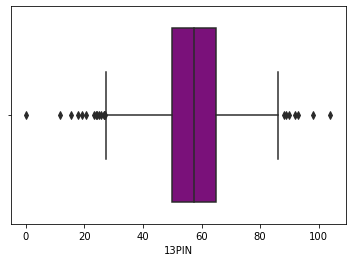

In [11]:
for col in unite_df.columns:   
    sns.boxplot(x = col, data = unite_df, color='darkmagenta')
    plt.show()

##### Визуализация данных с помощью попарных графиков рассеяния точек (матрица диаграмм рассеяния)

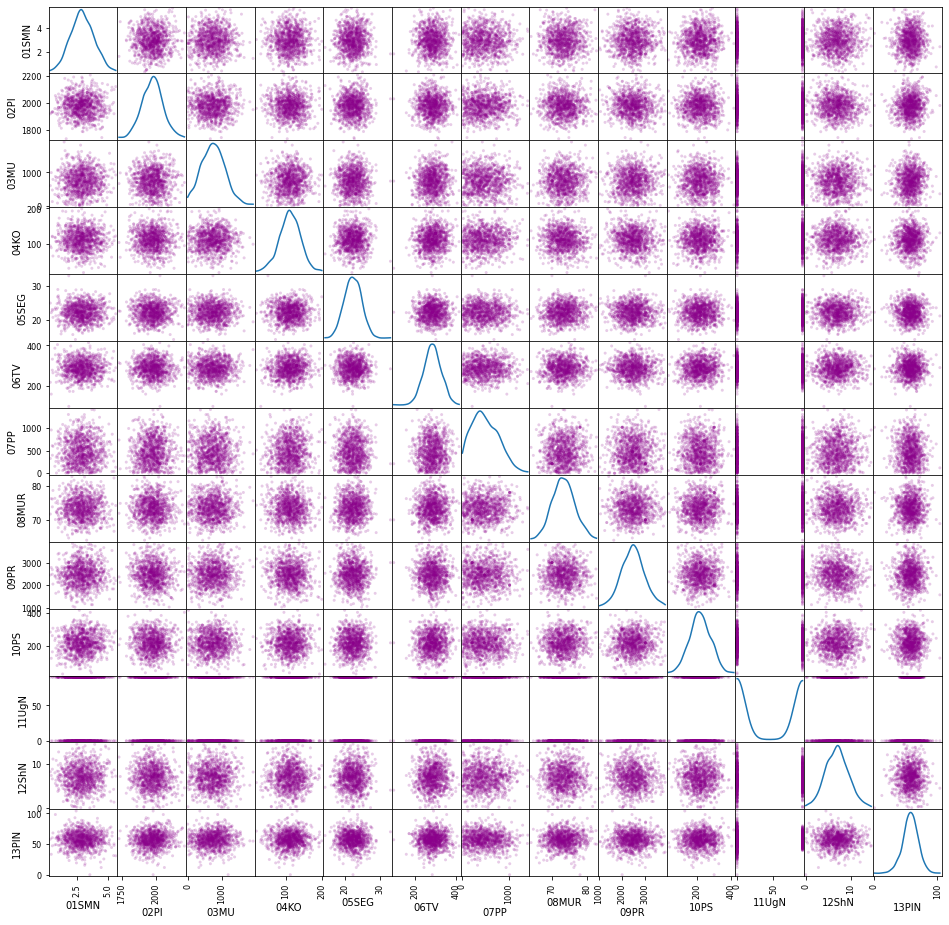

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(unite_df, alpha=0.2, figsize=(16, 16), diagonal='kde', color='darkmagenta');

##### Визуализация корреляционной матрицы с помощью тепловой карты

<AxesSubplot:>

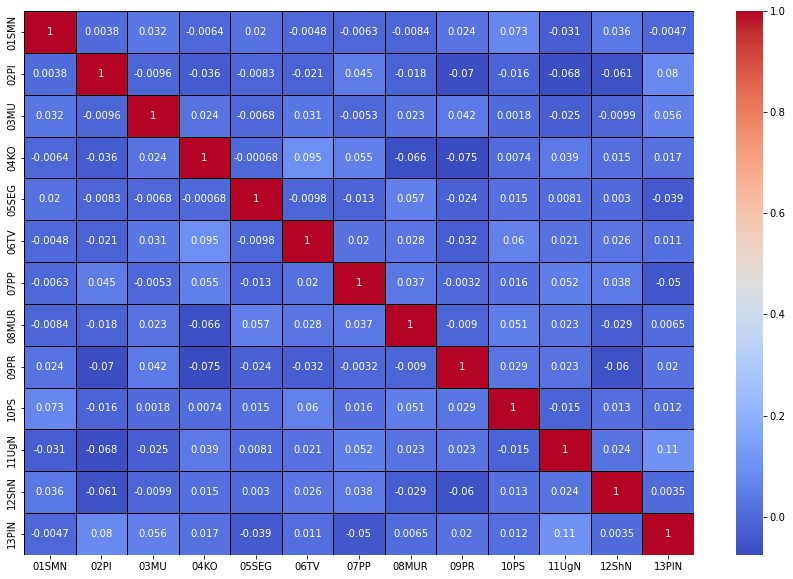

In [13]:
plt.figure(figsize = (15, 10))
sns.heatmap(unite_df.corr(), cmap = "coolwarm", annot = True, linewidths=1, linecolor='black')

## Предобработка данных

##### Поиск и удаление выбросов методом межквартильного расстояния

In [14]:
ndf = unite_df.copy(deep = True)

Поиск выбросов

In [15]:
for x in ndf:
    q75,q25 = np.percentile(ndf.loc[:,x],[75,25])
    intr_qr = q75-q25 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr) 
    ndf.loc[ndf[x] < min,x] = np.nan
    ndf.loc[ndf[x] > max,x] = np.nan
ndf

,01SMN,02Pl,03MU,04KO,05SEG,06TV,07PP,08MUR,09PR,10PS,11UgN,12ShN,13PlN
0,1.857143,2030.000000,738.736842,NaN,22.267857,NaN,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,NaN,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [16]:
ndf.isnull().sum()

01SMN     6
02Pl      9
03MU      2
04KO     14
05SEG     2
06TV      8
07PP      2
08MUR     6
09PR     11
10PS      8
11UgN     0
12ShN     4
13PlN    21
dtype: int64

Всего 64 выброса

Удаление выбросов

In [17]:
clean_ndf = ndf.dropna(axis = 0)
clean_ndf

,01SMN,02Pl,03MU,04KO,05SEG,06TV,07PP,08MUR,09PR,10PS,11UgN,12ShN,13PlN
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


После удаления выбросов в датасете осталось 936 строк и 13 колонок

#### Нормализация данных

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [19]:
mscaler = MinMaxScaler()
norm_df = pd.DataFrame(mscaler.fit_transform(clean_ndf), columns=clean_ndf.columns, index=clean_ndf.index)
norm_df

,01SMN,02Pl,03MU,04KO,05SEG,06TV,07PP,08MUR,09PR,10PS,11UgN,12ShN,13PlN
1,0.274768,0.651097,0.447061,0.079153,0.607435,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.289334,0.557156
3,0.274768,0.651097,0.447061,0.630983,0.418887,0.583596,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.335840
4,0.466552,0.651097,0.455721,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.506083
5,0.465836,0.571539,0.452685,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.557156
6,0.424236,0.332865,0.488508,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.727399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361662,0.444480,0.552781,0.337550,0.333908,0.703458,0.161609,0.475147,0.463043,0.207613,1.0,0.660014,0.336177
1019,0.607674,0.704373,0.268550,0.749605,0.294428,0.362087,0.271207,0.464422,0.452087,0.182974,1.0,0.768759,0.450768
1020,0.573391,0.498274,0.251612,0.501991,0.623085,0.334063,0.572959,0.578740,0.575296,0.585446,1.0,0.301102,0.687046
1021,0.662497,0.748688,0.448724,0.717585,0.267818,0.466417,0.496511,0.535142,0.334513,0.451779,1.0,0.458245,0.527552


### Анализ данных после удаления выбросов и нормализации

##### С помощью метода describe получаем основные статистические характеристики по каждой переменной

In [20]:
norm_df.describe().round(4)

,01SMN,02Pl,03MU,04KO,05SEG,06TV,07PP,08MUR,09PR,10PS,11UgN,12ShN,13PlN
count,936.0000,936.0000,936.0000,936.0000,936.0000,936.0000,936.0000,936.0000,936.0000,936.0000,936.0000,936.0000,936.0000
mean,0.4989,0.5027,0.4468,0.5047,0.4912,0.5161,0.3737,0.4886,0.4957,0.5211,0.5118,0.5022,0.5138
std,0.1875,0.1878,0.1996,0.1889,0.1806,0.1906,0.2171,0.1915,0.1889,0.1958,0.5001,0.1833,0.1913
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.3723,0.3685,0.3012,0.3762,0.3677,0.3861,0.2056,0.3590,0.3651,0.3921,0.0000,0.3722,0.3905
50%,0.4945,0.5112,0.4471,0.5060,0.4894,0.5160,0.3542,0.4858,0.4918,0.5238,1.0000,0.5043,0.5160
75%,0.6292,0.6250,0.5804,0.6380,0.6234,0.6464,0.5387,0.6151,0.6129,0.6524,1.0000,0.6246,0.6388
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Где:

*   count - количество строк
*   mean - среднее значение
*   std - стандартное отклонение
*   min - минимальное значение
*   25% - первый квартиль
*   50%	- второй квартиль, медиана
*   75% - третий квартиль
*   max - максимальное значение

##### Визуализация данных с помощью диаграмм ящика с усами каждой из переменных

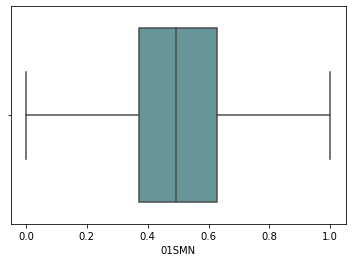

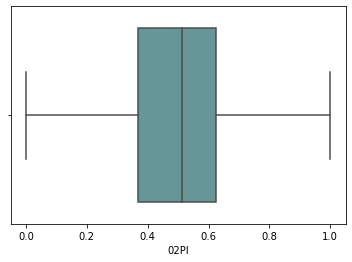

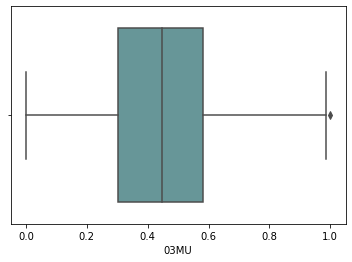

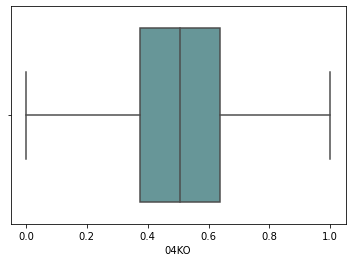

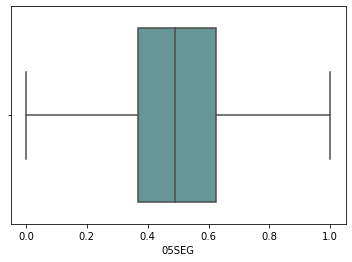

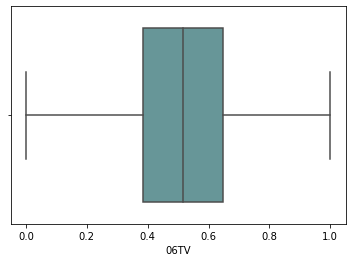

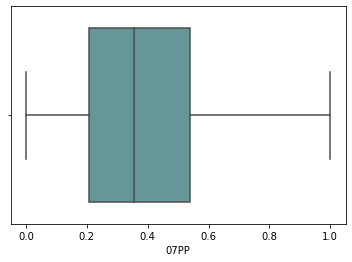

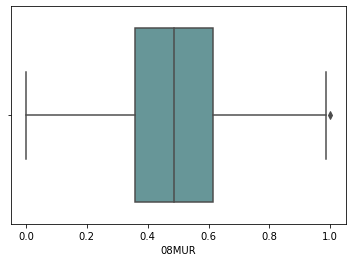

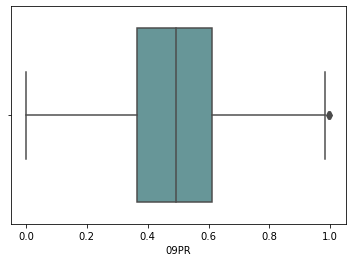

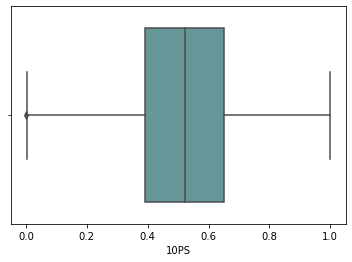

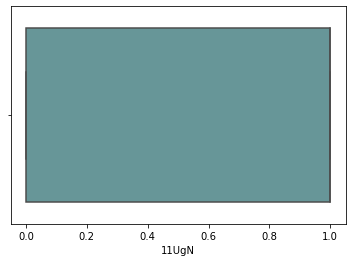

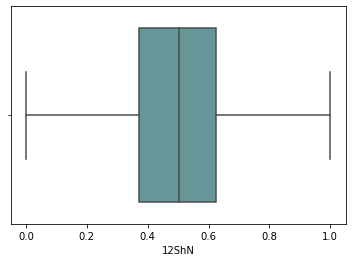

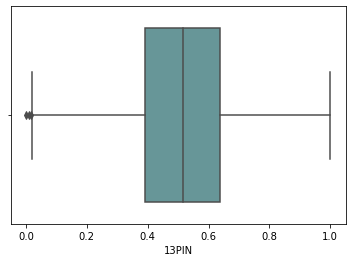

In [21]:
for col in norm_df.columns:   
    sns.boxplot(x = col, data = norm_df, color='cadetblue')
    plt.show()

##### Визуализация корреляционной матрицы с помощью тепловой карты

<AxesSubplot:>

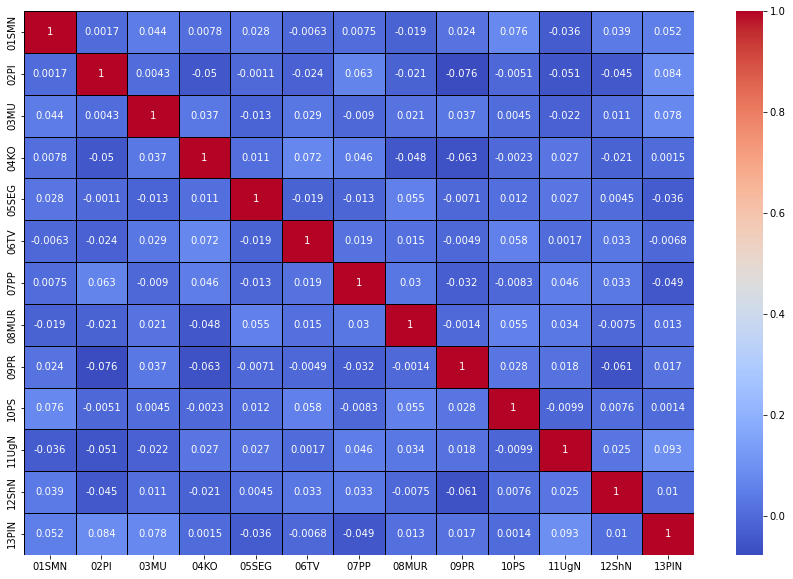

In [22]:
plt.figure(figsize = (15, 10))
sns.heatmap(norm_df.corr(), cmap = "coolwarm", annot = True, linewidths=1, linecolor='black')

## Построение моделей

### Разделение датасета (norm_df) на тестовую (30%) и тренировочную (70%) выборки

##### Модуль упругости при растяжении 

In [23]:
data_1 = norm_df.drop(['09PR'], axis = 1)

In [24]:
X_1 = data_1.drop(['08MUR'], axis = 1)
y_1 = norm_df['08MUR']

In [25]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = 0.3, random_state=1)

In [26]:
X_1_train.shape

(655, 11)

In [27]:
X_1_test.shape

(281, 11)

##### Прочность при растяжении 

In [28]:
data_2 = norm_df.drop(['08MUR'], axis = 1)

In [29]:
X_2 = data_2.drop(['09PR'], axis = 1)
y_2 = norm_df['09PR']

In [30]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = 0.3, random_state=1)

In [31]:
X_2_train.shape

(655, 11)

In [32]:
X_2_test.shape

(281, 11)

Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке  

In [33]:
def mean_model(y_1_test):
    return [np.mean(y_1_test) for _ in range(len(y_1_test))]
y_1_pred_mean = mean_model(y_1_test)
def mean_model(y_2_test):
    return [np.mean(y_2_test) for _ in range(len(y_2_test))]
y_2_pred_mean = mean_model(y_2_test)

### Линейная регрессия (Linear Regression)

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

##### Прогноз модуля упругости при растяжении

In [35]:
lin_reg.fit(X_1_train, y_1_train)

LinearRegression()

Скор для тренировочной выборки

In [36]:
print("Train score:", lin_reg.score(X_1_train, y_1_train))

Train score: 0.021099855832543812


Скор для тестовой выборки

In [37]:
print("Test score:", lin_reg.score(X_1_test, y_1_test))

Test score: -0.019301402088411024


Предсказание значения для модуля упругости при растяжении

In [38]:
y_1_pred = lin_reg.predict(X_1_test)
df_lin = pd.DataFrame({'Actual': y_1_test, 'Predicted': y_1_pred})
df_lin.head()

,Actual,Predicted
431,0.223731,0.509418
45,0.655833,0.483599
803,0.387603,0.500337
674,0.585272,0.513564
38,0.373538,0.474810


Результаты модели для модуля упругости при растяжении

In [39]:
mse_lin_elast = mean_squared_error(y_1_test, y_1_pred)
print("MAE: ", mean_absolute_error(y_1_test, y_1_pred))
print("MSE: ", mse_lin_elast)
print("RMSE: ", np.sqrt(mse_lin_elast)) 

MAE:  0.16046435043402993
MSE:  0.037891696546040805
RMSE:  0.19465789618209894


Результаты модели, выдающей среднее значение

In [40]:
mse_lin_elast_mean = mean_squared_error(y_1_test, y_1_pred_mean)
print("MAE for mean target: ", mean_absolute_error(y_1_test, y_1_pred_mean))
print("MSE for mean target: ", mse_lin_elast_mean)
print("RMSE for mean target: ", np.sqrt(mse_lin_elast_mean))

MAE for mean target:  0.15862890030602714
MSE for mean target:  0.03717418269846959
RMSE for mean target:  0.1928060753671149


Визуализация графика, показывающего насколько предсказанные значения совпадают с фактическими

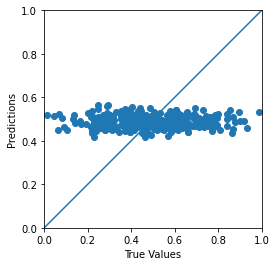

In [41]:
a = plt.axes(aspect='equal')
plt.scatter(y_1_test, y_1_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Визуализация гистограммы распределения ошибки

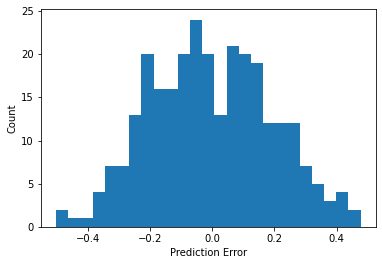

In [42]:
error = y_1_test - y_1_pred
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [43]:
test_results_elast = {}
test_results_elast['Linear model'] = np.sqrt(mse_lin_elast)

##### Прогноз прочности при растяжении

In [44]:
lin_reg= LinearRegression()
lin_reg.fit(X_2_train, y_2_train)

LinearRegression()

Скор для тренировочной выборки

In [45]:
print("Train score:", lin_reg.score(X_2_train, y_2_train))

Train score: 0.025484538437679283


Скор для тестовой выборки

In [46]:
print("Test score:", lin_reg.score(X_2_test, y_2_test))

Test score: -0.018288843718546888


Предсказание значения для прочности при растяжении

In [47]:
y_2_pred = lin_reg.predict(X_2_test)
df_lin = pd.DataFrame({'Actual': y_2_test, 'Predicted': y_2_pred})
df_lin.head()

,Actual,Predicted
431,0.140630,0.498494
45,0.158646,0.501529
803,0.583773,0.505108
674,0.328720,0.585863
38,0.606789,0.459807


Результаты модели для прочности при растяжении

In [48]:
mse_lin_strength = mean_squared_error(y_2_test, y_2_pred)
print("MAE: ", mean_absolute_error(y_2_test, y_2_pred))
print("MSE: ", mse_lin_strength)
print("RMSE: ", np.sqrt(mse_lin_strength))

MAE:  0.15059623096418548
MSE:  0.034966821803512245
RMSE:  0.18699417585452294


Результаты модели, выдающей среднее значение

In [49]:
mse_lin_strength_mean = mean_squared_error(y_2_test, y_2_pred_mean)
print("MAE for mean target: ", mean_absolute_error(y_2_test, y_2_pred_mean))
print("MSE for mean target: ", mse_lin_strength_mean)
print("RMSE for mean target: ", np.sqrt(mse_lin_strength_mean))

MAE for mean target:  0.14880406564050752
MSE for mean target:  0.03433880476959935
RMSE for mean target:  0.18530732519142182


Визуализация графика, показывающего насколько предсказанные значения совпадают с фактическими

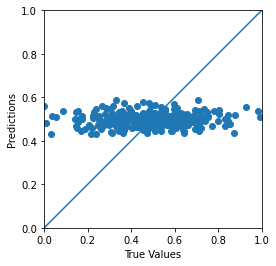

In [50]:
a = plt.axes(aspect='equal')
plt.scatter(y_2_test, y_2_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Визуализация гистограммы распределения ошибки

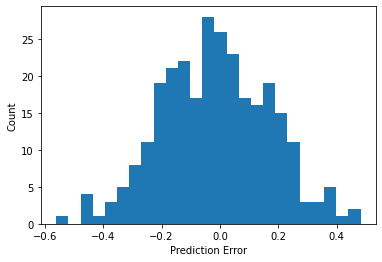

In [51]:
error = y_2_test - y_2_pred
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [52]:
test_results_strength = {}
test_results_strength['Linear model'] = np.sqrt(mse_lin_strength)

### Случайный лес (Random Forest Regressor)

In [53]:
from sklearn.ensemble import RandomForestRegressor

##### Прогноз модуля упругости при растяжении

In [54]:
rf_reg = RandomForestRegressor(random_state = 42)

Создание сетки параметров на основе результатов случайного поиска

In [55]:
param_grid = {
    'max_depth': [10, 15, 20, 25],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
};

Модель поиска по сетке

In [56]:
grid_search_rf_reg = GridSearchCV(estimator = rf_reg, param_grid = param_grid, cv = 10, n_jobs = -1)

Обучение модели

In [57]:
grid_search_rf_reg.fit(X_1_train, y_1_train);

Поиск наилучших параметров для модели

In [58]:
grid_search_rf_reg.best_params_

{'max_depth': 10, 'n_estimators': 600}

Скор для тренировочной выборки

In [59]:
print("Train score:", grid_search_rf_reg.score(X_1_train, y_1_train))

Train score: 0.6671588727211148


Скор для тестовой выборки

In [60]:
print("Test score:", grid_search_rf_reg.score(X_1_test, y_1_test))

Test score: -0.06900943129612003


Предсказание значения модуля упругости при растяжении

In [61]:
y_1_pred = grid_search_rf_reg.predict(X_1_test)
df_rf_reg = pd.DataFrame({'Actual': y_1_test, 'Predicted': y_1_pred})
df_rf_reg.head()

,Actual,Predicted
431,0.223731,0.448524
45,0.655833,0.555073
803,0.387603,0.530972
674,0.585272,0.490443
38,0.373538,0.518295


Результаты модели для модуля упругости при растяжении

In [62]:
mse_rf_elast = mean_squared_error(y_1_test, y_1_pred)
print("MAE: ", mean_absolute_error(y_1_test, y_1_pred))
print("MSE: ", mse_rf_elast)
print("RMSE: ", np.sqrt(mse_rf_elast)) 

MAE:  0.1628855618751809
MSE:  0.03973955190538904
RMSE:  0.1993478164048682


Результаты модели, выдающей среднее значение

In [63]:
mse_rf_elast_mean = mean_squared_error(y_1_test, y_1_pred_mean)
print("MAE for mean target: ", mean_absolute_error(y_1_test, y_1_pred_mean))
print("MSE for mean target: ", mse_rf_elast_mean)
print("RMSE for mean target: ", np.sqrt(mse_rf_elast_mean))

MAE for mean target:  0.15862890030602714
MSE for mean target:  0.03717418269846959
RMSE for mean target:  0.1928060753671149


Визуализация графика, показывающего насколько предсказанные значения совпадают с фактическими

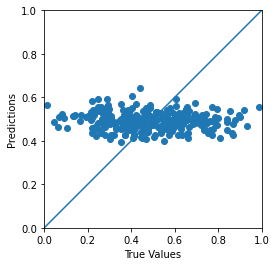

In [64]:
a = plt.axes(aspect='equal')
plt.scatter(y_1_test, y_1_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Визуализация гистограммы распределения ошибки

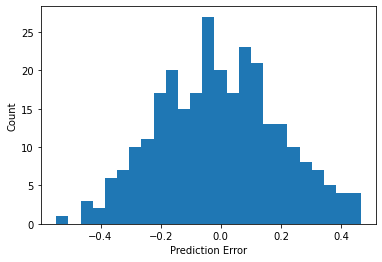

In [65]:
error = y_1_test - y_1_pred
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [66]:
test_results_elast['Random Forest'] = np.sqrt(mse_rf_elast)

##### Прогноз прочности при растяжении

In [67]:
rf_reg = RandomForestRegressor(random_state = 42)

Создание сетки параметров на основе результатов случайного поиска

In [68]:
param_grid = {
    'max_depth': [10, 15, 20, 25],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
};

Модель поиска по сетке

In [69]:
grid_search_rf_reg = GridSearchCV(estimator = rf_reg, param_grid = param_grid, cv = 10, n_jobs = -1)

Обучение модели

In [70]:
grid_search_rf_reg.fit(X_2_train, y_2_train);

Поиск наилучших параметров для модели

In [71]:
grid_search_rf_reg.best_params_

{'max_depth': 10, 'n_estimators': 800}

Скор для тренировочной выборки

In [72]:
print("Train score:", grid_search_rf_reg.score(X_2_train, y_2_train))

Train score: 0.6827932558717335


Скор для тестовой выборки

In [73]:
print("Test score:", grid_search_rf_reg.score(X_2_test, y_2_test))

Test score: -0.02307115980544916


Предсказание значения прочности при растяжении

In [74]:
y_2_pred = grid_search_rf_reg.predict(X_2_test)
df_rf_reg = pd.DataFrame({'Actual': y_2_test, 'Predicted': y_2_pred})
df_rf_reg.head()

,Actual,Predicted
431,0.140630,0.513258
45,0.158646,0.453219
803,0.583773,0.488911
674,0.328720,0.524397
38,0.606789,0.452220


Результаты модели для прочности при растяжении

In [75]:
mse_rf_strength = mean_squared_error(y_2_test, y_2_pred)
print("MAE: ", mean_absolute_error(y_2_test, y_2_pred))
print("MSE: ", mse_rf_strength)
print("RMSE: ", np.sqrt(mse_rf_strength)) 

MAE:  0.15245570089917115
MSE:  0.03513104082196689
RMSE:  0.1874327634699091


Результаты модели, выдающей среднее значение

In [76]:
mse_rf_strength_mean = mean_squared_error(y_2_test, y_2_pred_mean)
print("MAE for mean target: ", mean_absolute_error(y_2_test, y_2_pred_mean))
print("MSE for mean target: ", mse_rf_strength_mean)
print("RMSE for mean target: ", np.sqrt(mse_rf_strength_mean))

MAE for mean target:  0.14880406564050752
MSE for mean target:  0.03433880476959935
RMSE for mean target:  0.18530732519142182


Визуализация графика, показывающего насколько предсказанные значения совпадают с фактическими

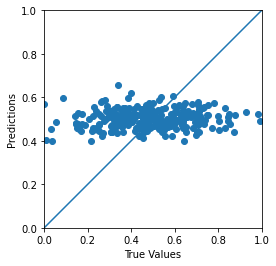

In [77]:
a = plt.axes(aspect='equal')
plt.scatter(y_2_test, y_2_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Визуализация гистограммы распределения ошибки

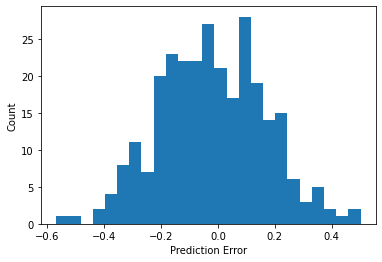

In [78]:
error = y_2_test - y_2_pred
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [79]:
test_results_strength['Random Forest'] = np.sqrt(mse_rf_strength)

## Градиентный бустинг (GradientBoostingRegressor)

In [80]:
from sklearn.ensemble import GradientBoostingRegressor 

##### Модуль упругости при растяжении

In [81]:
GBR = GradientBoostingRegressor()

Создание сетки параметров на основе результатов случайного поиска

In [82]:
parameters = {'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
              'max_depth'    : [5, 10, 15, 20]
             }

Модель поиска по сетке

In [83]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 10, n_jobs=-1)

Обучение модели

In [84]:
grid_GBR.fit(X_1_train, y_1_train);

Поиск наилучших параметров для модели

In [85]:
grid_GBR.best_params_

{'max_depth': 10, 'n_estimators': 400}

Скор для тренировочной выборки

In [86]:
print("Train score:", grid_GBR.score(X_1_train, y_1_train))

Train score: 0.9999999999991441


Скор для тестовой выборки

In [87]:
print("Test score:", grid_GBR.score(X_1_test, y_1_test))

Test score: -0.2244839904869227


Предсказание значения модуля упругости при растяжении

In [88]:
y_1_pred = grid_GBR.predict(X_1_test)
df_GBR = pd.DataFrame({'Actual': y_1_test, 'Predicted': y_1_pred})
df_GBR.head()

,Actual,Predicted
431,0.223731,0.329929
45,0.655833,0.614063
803,0.387603,0.491750
674,0.585272,0.338735
38,0.373538,0.601949


Результаты модели для модуля упругости при растяжении

In [89]:
mse_GBR_elast = mean_squared_error(y_1_test, y_1_pred)
print("MAE: ", mean_absolute_error(y_1_test, y_1_pred))
print("MSE: ", mse_GBR_elast)
print("RMSE: ", np.sqrt(mse_GBR_elast)) 

MAE:  0.17369867184869742
MSE:  0.04551919157371196
RMSE:  0.21335227107699595


Результаты модели, выдающей среднее значение

In [90]:
mse_GBR_elast_mean = mean_squared_error(y_1_test, y_1_pred_mean)
print("MAE for mean target: ", mean_absolute_error(y_1_test, y_1_pred_mean))
print("MSE for mean target: ", mse_GBR_elast_mean)
print("RMSE for mean target: ", np.sqrt(mse_GBR_elast_mean))

MAE for mean target:  0.15862890030602714
MSE for mean target:  0.03717418269846959
RMSE for mean target:  0.1928060753671149


Визуализация графика, показывающего насколько предсказанные значения совпадают с фактическими

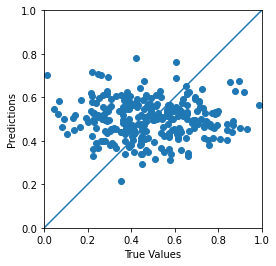

In [91]:
a = plt.axes(aspect='equal')
plt.scatter(y_1_test, y_1_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Визуализация гистограммы распределения ошибки

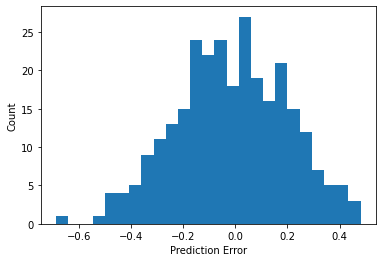

In [92]:
error = y_1_test - y_1_pred
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [93]:
test_results_elast['Gradient Boosting'] = np.sqrt(mse_GBR_elast)

##### Прочность при растяжении

In [94]:
GBR = GradientBoostingRegressor()

Создание сетки параметров на основе результатов случайного поиска

In [95]:
parameters = {'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
              'max_depth'    : [5, 10, 15, 20]
             }

Модель поиска по сетке

In [96]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 10, n_jobs=-1)

Обучение модели

In [97]:
grid_GBR.fit(X_2_train, y_2_train);

Поиск наилучших параметров для модели

In [98]:
grid_GBR.best_params_

{'max_depth': 5, 'n_estimators': 100}

Скор для тренировочной выборки

In [99]:
print("Train score:", grid_GBR.score(X_2_train, y_2_train))

Train score: 0.8674052445050267


Скор для тестовой выборки

In [100]:
print("Test score:", grid_GBR.score(X_2_test, y_2_test))

Test score: -0.12286251987492536


Предсказание значения прочности при растяжении

In [101]:
y_2_pred = grid_GBR.predict(X_2_test)

Результаты модели для прочности при растяжении

In [102]:
mse_GBR_strength = mean_squared_error(y_2_test, y_2_pred)
print("MAE: ", mean_absolute_error(y_2_test, y_2_pred))
print("MSE: ", mse_GBR_strength)
print("RMSE: ", np.sqrt(mse_GBR_strength)) 

MAE:  0.16044213444662303
MSE:  0.038557756853085434
RMSE:  0.19636129163632388


Результаты модели, выдающей среднее значение

In [103]:
mse_GBR_strength_mean = mean_squared_error(y_2_test, y_2_pred_mean)
print("MAE for mean target: ", mean_absolute_error(y_2_test, y_2_pred_mean))
print("MSE for mean target: ", mse_GBR_strength_mean)
print("RMSE for mean target: ", np.sqrt(mse_GBR_strength_mean))

MAE for mean target:  0.14880406564050752
MSE for mean target:  0.03433880476959935
RMSE for mean target:  0.18530732519142182


Визуализация графика, показывающего насколько предсказанные значения совпадают с фактическими

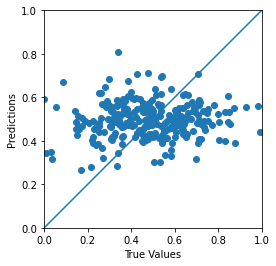

In [104]:
a = plt.axes(aspect='equal')
plt.scatter(y_2_test, y_2_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Визуализация гистограммы распределения ошибки

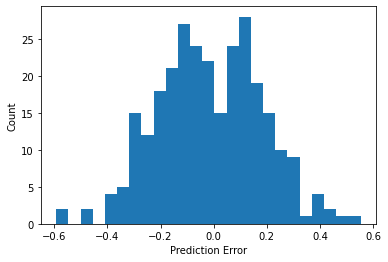

In [105]:
error = y_2_test - y_2_pred
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [106]:
test_results_strength['Gradient Boosting'] = np.sqrt(mse_GBR_strength)

### Результаты по моделям

In [107]:
pd.DataFrame(test_results_elast, index=['RMSE (Модуль упругости при растяжении)']).T

,RMSE (Модуль упругости при растяжении)
Linear model,0.194658
Random Forest,0.199348
Gradient Boosting,0.213352


In [108]:
pd.DataFrame(test_results_strength, index=['RMSE (Прочность при растяжении)']).T

,RMSE (Прочность при растяжении)
Linear model,0.186994
Random Forest,0.187433
Gradient Boosting,0.196361


## Нейронная сеть рекомендации соотношения матрицы-наполнителя

In [109]:
input_columns_names = ["02Pl", "03MU", "04KO", "05SEG", "06TV", "07PP", "08MUR", "09PR", "10PS", "11UgN", "12ShN", "13PlN"]
output_columns_names = ["01SMN"]
                    
X_3 = norm_df[input_columns_names]
y_3 = norm_df[output_columns_names]

In [110]:
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size = 0.3, random_state=1)

#### Модель

In [111]:
model = keras.Sequential(
    [
    layers.Dense(64, activation = 'relu', input_dim=12),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1),
    ]
)

model.compile(optimizer='adam', 
              loss='mse', 
              metrics='mae')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,377
Trainable params: 13,377
Non-trainable params: 0
_________________________________________________________________


In [112]:
history = model.fit(X_3_train, y_3_train, epochs=100)

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 0.0882 - mae: 0.2384
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0366 - mae: 0.1534
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0353 - mae: 0.1515
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0346 - mae: 0.1501
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0340 - mae: 0.1486
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0337 - mae: 0.1481
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0336 - mae: 0.1479
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0328 - mae: 0.1458
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0332 - mae: 0.1467
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0329 - mae: 0.1463
Epoch 11/100
21/21 [==============================] - 0s 2m

21/21 [==============================] - 0s 2ms/step - loss: 0.0039 - mae: 0.0470
Epoch 88/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0040 - mae: 0.0476
Epoch 89/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0036 - mae: 0.0452
Epoch 90/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0035 - mae: 0.0451
Epoch 91/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0035 - mae: 0.0447
Epoch 92/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0030 - mae: 0.0418
Epoch 93/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0031 - mae: 0.0412
Epoch 94/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0028 - mae: 0.0395
Epoch 95/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0025 - mae: 0.0380
Epoch 96/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0023 - mae: 0.0361
Epoch 97/100
21/21 [==============================] - 0s 2ms/st

#### Результат нейронной сети на тестовой выборке

In [113]:
score = model.evaluate(X_3_test, y_3_test, verbose=0)
print('mse:', score[0])
print('mae', score[1])

mse: 0.06778905540704727
mae 0.21230626106262207


Сохранение модели

In [114]:
model.save('Data\model')

INFO:tensorflow:Assets written to: Data\model\assets


In [115]:
X_3_test.shape

(281, 12)

Предсказание модели

In [116]:
y_3_pred = model.predict(X_3_test)
y_3_pred

array([[0.34746516],
       [0.4747664 ],
       [0.45379072],
       [0.02591733],
       [0.7222673 ],
       [0.55074006],
       [0.42513022],
       [0.33304074],
       [0.3833923 ],
       [0.52155644],
       [0.4976239 ],
       [0.27602887],
       [0.42040688],
       [0.06195727],
       [0.3826988 ],
       [0.3310391 ],
       [0.76765543],
       [0.5172488 ],
       [0.3192198 ],
       [0.50214124],
       [0.7705428 ],
       [0.490413  ],
       [0.6507313 ],
       [0.43352163],
       [0.4360598 ],
       [0.6579137 ],
       [0.5608874 ],
       [0.6181464 ],
       [0.30591726],
       [0.47507018],
       [0.3219936 ],
       [0.39237595],
       [0.5502882 ],
       [0.5688003 ],
       [0.29049876],
       [0.3669574 ],
       [0.41084883],
       [0.30184063],
       [0.28147727],
       [0.6698033 ],
       [0.35186568],
       [0.43734804],
       [0.12668242],
       [0.67784494],
       [0.55722296],
       [0.43582305],
       [0.41380724],
       [0.385

In [117]:
y_3_pred.reshape(X_3_test.shape[0])

array([0.34746516, 0.4747664 , 0.45379072, 0.02591733, 0.7222673 ,
       0.55074006, 0.42513022, 0.33304074, 0.3833923 , 0.52155644,
       0.4976239 , 0.27602887, 0.42040688, 0.06195727, 0.3826988 ,
       0.3310391 , 0.76765543, 0.5172488 , 0.3192198 , 0.50214124,
       0.7705428 , 0.490413  , 0.6507313 , 0.43352163, 0.4360598 ,
       0.6579137 , 0.5608874 , 0.6181464 , 0.30591726, 0.47507018,
       0.3219936 , 0.39237595, 0.5502882 , 0.5688003 , 0.29049876,
       0.3669574 , 0.41084883, 0.30184063, 0.28147727, 0.6698033 ,
       0.35186568, 0.43734804, 0.12668242, 0.67784494, 0.55722296,
       0.43582305, 0.41380724, 0.38556898, 0.5889717 , 0.23820974,
       0.31304267, 0.41254127, 0.46496376, 0.64359766, 0.45659602,
       0.46216413, 0.41086102, 0.511516  , 0.34528217, 0.31506154,
       0.30746868, 0.3600932 , 0.5625121 , 0.2040896 , 0.33812198,
       0.3056973 , 0.1628058 , 0.4925086 , 0.46796808, 0.39401087,
       0.25437135, 0.2459424 , 0.53519756, 0.48576596, 0.33590

In [118]:
X_3_test.head()

,02Pl,03MU,04KO,05SEG,06TV,07PP,08MUR,09PR,10PS,11UgN,12ShN,13PlN
431,0.781616,0.312088,0.270060,0.686552,0.214688,0.311714,0.223731,0.140630,0.619993,0.0,0.284227,0.269145
45,0.341828,0.498174,0.732806,0.647075,0.462590,0.201633,0.655833,0.158646,0.624846,0.0,0.556313,0.107221
803,0.414745,0.492458,0.486160,0.600314,0.442220,0.619199,0.387603,0.583773,0.252419,1.0,0.554320,0.429274
674,0.712868,0.597066,0.143467,0.505914,0.582004,0.334669,0.585272,0.328720,0.270875,1.0,0.019576,0.785109
38,0.798269,0.563986,0.502210,0.587611,0.439841,0.215091,0.373538,0.606789,0.420412,1.0,0.727458,0.557156
